In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Answers islamic - Feuille 1.csv')
data.head(50)

,id,answers,score
0,1,عيسى عليه السلام,2
1,1,النبي عيسى عليه السلام,2
2,1,نبي الله عيسى عليه السلام,2
3,1,نبي الله عيسى,2
4,1,النبي عيسى,2
5,1,النبي عيسى عليه السلام,2
6,1,عيسى نبي الله,2
7,1,نبي الله عيسى بن مريم,2
8,1,عيسى نبي الله,2
9,1,النبي عيسى,2


*<h1>EDA<h1>*

In [3]:
data.groupby('score').size()
def g(df):
    for i in df['score'].value_counts().index:
        print(f"there is {df['score'].value_counts()[i]} for score {i}")
g(data.copy())

there is 594 for score 2
there is 350 for score 0
there is 36 for score 1


In [4]:
data.duplicated().sum()

138

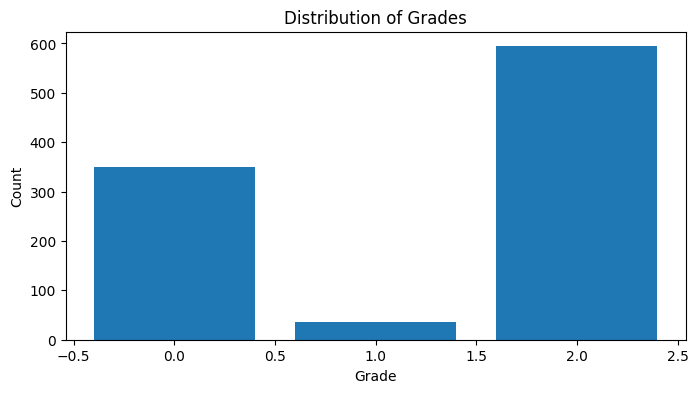

In [5]:
# Count the number of occurrences of each grade
grade_counts = data['score'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(grade_counts.index, grade_counts.values)
plt.xlabel("Grade")
plt.ylabel("Count")
plt.title("Distribution of Grades")
plt.show()

*<h1>Preprocessing<h1>*

In [6]:
from sklearn.preprocessing import LabelEncoder
# Preprocessing
data.drop_duplicates(inplace=True)
le = LabelEncoder()
data['score'] = le.fit_transform(data['score'])

*<h3>stanza process<h3>*
<img src="pipeline.png" alt="Getting started" style="width: 500px; height: 300px;" />


In [7]:
import stanza
from keras.utils import to_categorical

# Download the stanza model for Arabic
stanza.download('ar')
#pipeline for Arabic
nlp = stanza.Pipeline('ar')

def preprocess_text(text):
    doc = nlp(text)
    tokens = [word.lemma for sent in doc.sentences for word in sent.words if word.upos != 'PUNCT']
    return tokens

data['answers'] = data['answers'].apply(preprocess_text)

2024-01-10 20:34:27 INFO: Downloading default packages for language: ar (Arabic) ...
2024-01-10 20:34:28 INFO: File exists: C:\Users\zakar\stanza_resources\ar\default.zip
2024-01-10 20:34:31 INFO: Finished downloading models and saved to C:\Users\zakar\stanza_resources.
2024-01-10 20:34:31 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-01-10 20:34:32 INFO: Loading these models for language: ar (Arabic):
| Processor | Package       |
-----------------------------
| tokenize  | padt          |
| mwt       | padt          |
| pos       | padt_charlm   |
| lemma     | padt_nocharlm |
| depparse  | padt_charlm   |
| ner       | aqmar_charlm  |

2024-01-10 20:34:32 INFO: Using device: cpu
2024-01-10 20:34:32 INFO: Loading: tokenize
2024-01-10 20:34:33 INFO: Loading: mwt
2024-01-10 20:34:33 INFO: Loading: pos
2024-01-10 20:34:33 INFO: Loading: lemma
2024-01-10 20:34:33 INFO: Loading: depparse
2024-01-10 20:34:33 INFO: Loading: ner
2024-01-10 20:34:34 INFO: Done loading processors!


In [8]:
data['answers'] 

0                   [عيسى, علي, هُوَ, سَلَام]
1         [نَبِيّ, عيسى, عَلَى, هُوَ, سَلَام]
2      [نبي, الله, عيسى, عَلَى, هُوَ, سَلَام]
3                           [نبي, الله, عيسى]
4                              [نَبِيّ, عيسى]
                        ...                  
972                       [لَا, أعرف, جَوَاب]
973                               [لَا, أعرف]
974                              [لَا, عَلِم]
975                                     [لوط]
976                                    [ثمود]
Name: answers, Length: 842, dtype: object

*<h2>Word Embedding :<h2>*

In [9]:
# Import necessary libraries
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer
tokenizer = Tokenizer(filters=''''!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ''''' )

# Fit the tokenizer on your text data
tokenizer.fit_on_texts(data['answers'])

# Convert your text data to sequences of integers
sequences = tokenizer.texts_to_sequences(data['answers'])

# Find the length of the longest sequence
max_sequence_length = max(len(s) for s in sequences)

# Pad your sequences so they all have the same length
sequences = pad_sequences(sequences,max_sequence_length)

# Get a dictionary where the keys are words and the values are their corresponding integer values
word2idx = tokenizer.word_index

# Get the size of your vocabulary
vocab_size = len(word2idx) + 1

In [10]:
from gensim.models import FastText

# Set the size of your embeddings
EMBEDDING_DIM = 300

# Initialize an embedding matrix with zeros
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
# Train FastText model
fasttext_model = FastText(data['answers'], vector_size=EMBEDDING_DIM, window=5, min_count=1, workers=4)
fasttext_model.save("fasttext_model.bin")
# Fill the embedding matrix with FastText vectors
for word, idx in word2idx.items():
    if word in fasttext_model.wv.key_to_index:
        embedding_matrix[idx] = fasttext_model.wv[word]
    else:
        print("word not exist in voca ---> " + word)


In [11]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11113418, -0.11729062, -0.02951763, ...,  0.06930213,
         0.08747315, -0.09399497],
       [ 0.10189845, -0.10727303, -0.02626428, ...,  0.06399643,
         0.08301622, -0.08600292],
       ...,
       [ 0.03689757, -0.03874204, -0.0096352 , ...,  0.02408853,
         0.02965078, -0.03084039],
       [ 0.00949305, -0.01066184, -0.00289862, ...,  0.00590078,
         0.00804124, -0.00909136],
       [ 0.02592113, -0.02716943, -0.00635729, ...,  0.01669005,
         0.0204693 , -0.02130093]])

In [12]:
from sklearn.model_selection import train_test_split

scores = to_categorical(data['score'], num_classes=3)

# Assuming 'sequences' is your features and 'df['score']' is your labels
# X_train, X_test, y_train, y_test = train_test_split(sequences, scores, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(sequences, scores, test_size=0.2)


In [13]:
from keras.models import Sequential
from keras.layers import Embedding, Dense
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.optimizers import Adamax , Adam
from keras.layers import Dropout
from keras.layers import Bidirectional

*<h2>LSTM :<h2>*


Epoch 1/200


11/11 [==============================] - 2s 46ms/step - loss: 1.0485 - accuracy: 0.5810 - val_loss: 0.9730 - val_accuracy: 0.5621
Epoch 2/200
11/11 [==============================] - 0s 19ms/step - loss: 0.8972 - accuracy: 0.6077 - val_loss: 0.8546 - val_accuracy: 0.5621
Epoch 3/200
11/11 [==============================] - 0s 15ms/step - loss: 0.8097 - accuracy: 0.6077 - val_loss: 0.7974 - val_accuracy: 0.5621
Epoch 4/200
11/11 [==============================] - 0s 17ms/step - loss: 0.7681 - accuracy: 0.6077 - val_loss: 0.7643 - val_accuracy: 0.5621
Epoch 5/200
11/11 [==============================] - 0s 15ms/step - loss: 0.7393 - accuracy: 0.6092 - val_loss: 0.7479 - val_accuracy: 0.5621
Epoch 6/200
11/11 [==============================] - 0s 16ms/step - loss: 0.7472 - accuracy: 0.6092 - val_loss: 0.7420 - val_accuracy: 0.5621
Epoch 7/200
11/11 [==============================] - 0s 15ms/step - loss: 0.7298 - accuracy: 0.6196 - val_loss: 0.7302 - val_accuracy: 0.5917
Epo

c:\Users\zakar\OneDrive\Bureau\islamicProject\zakarenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


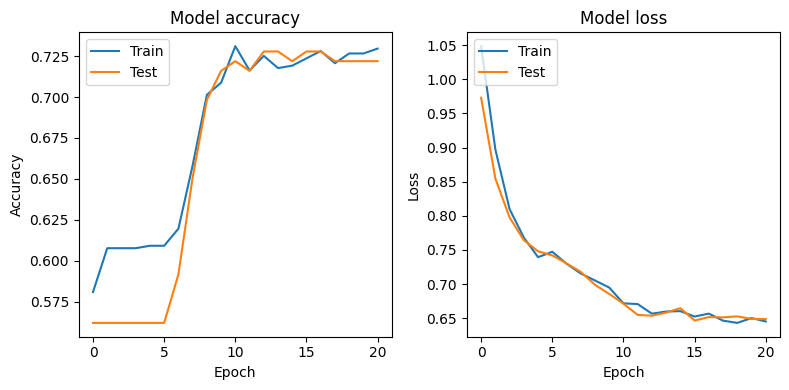

6/6 [==============================] - 0s 4ms/step - loss: 0.6486 - accuracy: 0.7219
LSTM Test Loss: 0.6486141681671143
LSTM Test Accuracy: 0.7218934893608093


In [14]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model.add(LSTM(units=64, activation='relu', return_sequences=True))
model.add(LSTM(units=32, activation='relu')) 
model.add(Dropout(0.1))  # Dropout layer added after LSTM
model.add(Dense(3, activation='softmax'))

learning_rate = 0.001
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
optimizer = Adamax(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64,callbacks=[early_stop])

# Save the model
model.save('Lstm.h5')

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

loss_lstm, accuracy_lstm = model.evaluate(X_test, y_test)
print(f'LSTM Test Loss: {loss_lstm}')
print(f'LSTM Test Accuracy: {accuracy_lstm}')


*<h2>RNN Simple:<h2>*

Epoch 1/100
22/22 [==============================] - 2s 20ms/step - loss: 0.8513 - accuracy: 0.6077 - val_loss: 0.7689 - val_accuracy: 0.5621
Epoch 2/100
22/22 [==============================] - 0s 8ms/step - loss: 0.6552 - accuracy: 0.7177 - val_loss: 0.6379 - val_accuracy: 0.7456
Epoch 3/100
22/22 [==============================] - 0s 10ms/step - loss: 0.5569 - accuracy: 0.7578 - val_loss: 0.5772 - val_accuracy: 0.7515
Epoch 4/100
22/22 [==============================] - 0s 15ms/step - loss: 0.4846 - accuracy: 0.7994 - val_loss: 0.5621 - val_accuracy: 0.7751
Epoch 5/100
22/22 [==============================] - 0s 9ms/step - loss: 0.4410 - accuracy: 0.8455 - val_loss: 0.5325 - val_accuracy: 0.7988
Epoch 6/100
22/22 [==============================] - 0s 8ms/step - loss: 0.3551 - accuracy: 0.8796 - val_loss: 0.4966 - val_accuracy: 0.8047
Epoch 7/100
22/22 [==============================] - 0s 8ms/step - loss: 0.3296 - accuracy: 0.8871 - val_loss: 0.4673 - val_accuracy: 0.8284
Epoch 8/10

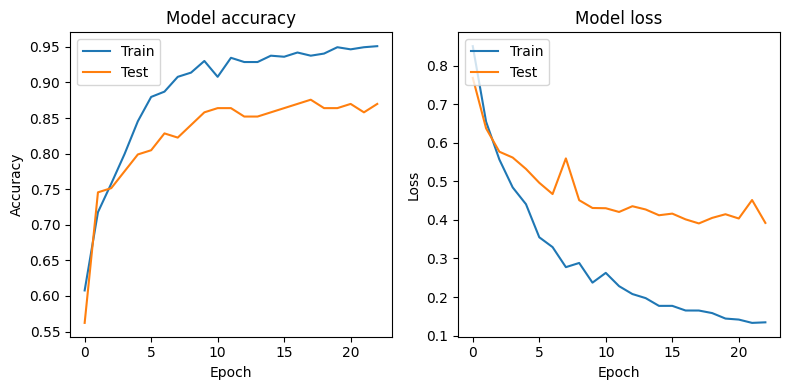

6/6 [==============================] - 0s 3ms/step - loss: 0.3924 - accuracy: 0.8698
RNN Test Loss: 0.39237600564956665
RNN Test Accuracy: 0.8698225021362305


In [15]:
from keras.layers import SimpleRNN

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_sequence_length))
model.add(SimpleRNN(units=128, activation='relu', return_sequences=True))
model.add(SimpleRNN(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

learning_rate = 0.001
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
optimizer = Adamax(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stop])

# Save the model
model.save('RNN_model.h5')


# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

loss_rnn, accuracy_rnn = model.evaluate(X_test, y_test)
print(f'RNN Test Loss: {loss_rnn}')
print(f'RNN Test Accuracy: {accuracy_rnn}')


*<h2>Transformers : <h2>*

In [16]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim ,embedding_matrix):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size,weights=[embedding_matrix], output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
        
    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [17]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)
    

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

Epoch 1/100
11/11 [==============================] - 2s 63ms/step - loss: 1.9199 - accuracy: 0.5305 - val_loss: 1.3376 - val_accuracy: 0.6627
Epoch 2/100
11/11 [==============================] - 1s 47ms/step - loss: 0.8950 - accuracy: 0.6924 - val_loss: 0.8498 - val_accuracy: 0.6982
Epoch 3/100
11/11 [==============================] - 1s 48ms/step - loss: 0.8519 - accuracy: 0.6776 - val_loss: 0.8136 - val_accuracy: 0.7160
Epoch 4/100
11/11 [==============================] - 1s 55ms/step - loss: 0.7972 - accuracy: 0.6805 - val_loss: 0.7995 - val_accuracy: 0.7219
Epoch 5/100
11/11 [==============================] - 1s 60ms/step - loss: 0.7911 - accuracy: 0.6820 - val_loss: 0.7758 - val_accuracy: 0.6982
Epoch 6/100
11/11 [==============================] - 0s 40ms/step - loss: 0.7324 - accuracy: 0.7207 - val_loss: 0.8402 - val_accuracy: 0.7219
Epoch 7/100
11/11 [==============================] - 0s 40ms/step - loss: 0.7159 - accuracy: 0.7325 - val_loss: 0.7658 - val_accuracy: 0.7219
Epoch 

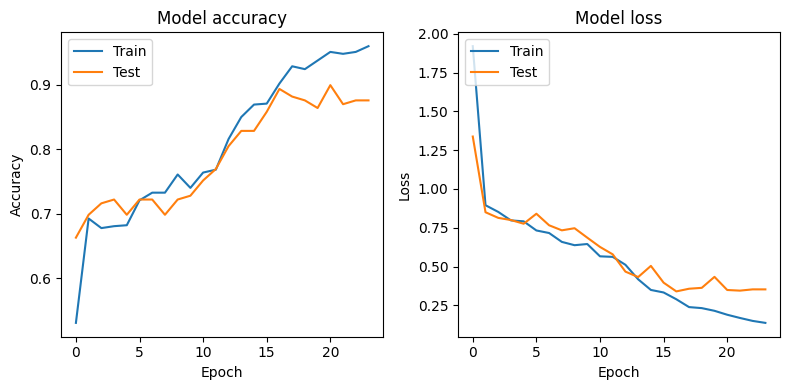

6/6 [==============================] - 0s 14ms/step - loss: 0.3527 - accuracy: 0.8757
Transformer Test Loss: 0.35272279381752014
Transformer Test Accuracy: 0.8757396340370178


In [18]:
def build_transformer_model(max_sequence_length, vocab_size, EMBEDDING_DIM, embedding_matrix):
    num_heads = 2  # Number of attention heads
    ff_dim = 10  # Hidden layer size in feed-forward network inside transformer

    inputs = layers.Input(shape=(max_sequence_length,))
    embedding_layer = TokenAndPositionEmbedding(max_sequence_length, vocab_size, EMBEDDING_DIM, embedding_matrix)
    x = embedding_layer(inputs)
    transformer_block = TransformerBlock(EMBEDDING_DIM, num_heads, ff_dim, 0.2)
    x = transformer_block(x)
    x = layers.GlobalMaxPooling1D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(3, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model
# Build the Transformer-based model
transformer_model = build_transformer_model(max_sequence_length, vocab_size, EMBEDDING_DIM, embedding_matrix)

learning_rate = 0.002
optimizer = Adamax(learning_rate=learning_rate)
# Compile the model
transformer_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='min')
# Train the model using your dataset
history = transformer_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, callbacks=[early_stop])

model.save('Transformer_model.h5')
# Plot training & validation accuracy values
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the Transformer-based model on the test set
loss_transformer, accuracy_transformer = transformer_model.evaluate(X_test, y_test)
print(f'Transformer Test Loss: {loss_transformer}')
print(f'Transformer Test Accuracy: {accuracy_transformer}')

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Assuming model is your trained model
y_pred_train = transformer_model.predict(X_train)
y_pred_train_classes = np.argmax(y_pred_train, axis=1)
y_true_train = np.argmax(y_train, axis=1)  # Assuming y_train is one-hot encoded

accuracy_train = accuracy_score(y_true_train, y_pred_train_classes)
precision_train = precision_score(y_true_train, y_pred_train_classes, average='weighted')
recall_train = recall_score(y_true_train, y_pred_train_classes, average='weighted')
f1_train = f1_score(y_true_train, y_pred_train_classes, average='weighted')
cohen_kappa_train = cohen_kappa_score(y_true_train, y_pred_train_classes)

print("Training Accuracy:%f%%" % (accuracy_train*100))
print("Training Precision:%f%%" % (precision_train*100))
print("Training Recall: %f%%" % (recall_train*100))
print("Training F1 Score:%f%%" % (f1_train*100))
print("Training Cohen Kappa:%f%%" % (cohen_kappa_train*100))


22/22 [==============================] - 0s 11ms/step
Training Accuracy:96.433878%
Training Precision:96.443215%
Training Recall: 96.433878%
Training F1 Score:96.436431%
Training Cohen Kappa:92.873782%


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Evaluate the Transformer-based model on the test set
predictions = transformer_model.predict(X_test)
y_pred_classes = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')
cohen_kappa = cohen_kappa_score(y_true, y_pred_classes)

print("Test Accuracy:%f%%" % (accuracy*100))
print("Test Precision:%f%%" % (precision*100))
print("Test Recall: %f%%" % (recall*100))
print("Test F1 Score:%f%%" % (f1*100))
print("Test Cohen Kappa:%f%%" % (cohen_kappa*100))

6/6 [==============================] - 0s 10ms/step
Test Accuracy:87.573964%
Test Precision:88.304747%
Test Recall: 87.573964%
Test F1 Score:87.905493%
Test Cohen Kappa:76.229069%


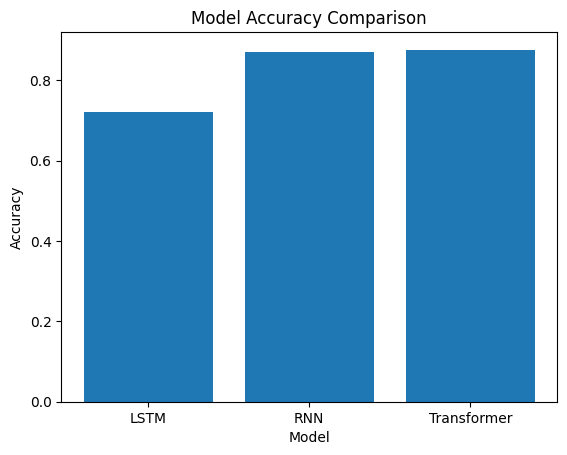

Accuracy Scores:
LSTM: 0.7218934893608093
RNN: 0.8698225021362305
Transformer: 0.8757396340370178


In [21]:
model_accuracies = [accuracy_lstm, accuracy_rnn, accuracy_transformer]
model_names = ['LSTM', 'RNN', 'Transformer']

plt.bar(model_names, model_accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

print("Accuracy Scores:")
for name, accuracy in zip(model_names, model_accuracies):
    print(f"{name}: {accuracy}")


In [22]:
# Evaluate the Transformer-based model on the test set
predictions_transformer = transformer_model.predict(X_test)
y_pred_classes_transformer = np.argmax(predictions_transformer, axis=1)
y_true_transformer = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

# Compare predictions with true labels for the Transformer model
for pred, true_label in zip(y_pred_classes_transformer, y_true_transformer):
    print(f"Predicted: {pred}, Actual: {true_label}")


6/6 [==============================] - 0s 9ms/step
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 0, Actual: 2
Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2
Predicted: 2, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2
Predicted: 0, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 0
Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 1, Actual: 1
Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2
Predicted: 2, Actual: 2
Predicted: 0, Actual: 0
Predicted: 2,